## Preprocessed Data4 (로그 변환 X, PCA X)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## 데이터 불러오기

In [ ]:
df = pd.read_csv('Train_preprocessed9.csv')
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0',
       'New_Item_Type_1', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3',
       'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7',
       'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11',
       'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'log_Item_Visibility',
       'Type1_Tear1', 'Type1_Tear2'],
      dtype='object')

In [ ]:
X =df.drop(columns=['Item_Outlet_Sales'], axis=1)
y =df['Item_Outlet_Sales']

### Processed 9 데이터 StandardScaler 

In [ ]:
from sklearn.preprocessing import StandardScaler

cont_vars = ['Item_Weight', 'log_Item_Visibility', 'Item_MRP', 'Outlet_Years']
cat_vars = ['Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8','Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Type1_Tear1',
       'Type1_Tear2']
scaler = StandardScaler()
df_cont = pd.DataFrame(scaler.fit_transform(X[cont_vars]), columns = cont_vars)
X_norm = pd.concat([df_cont, X[cat_vars]], axis=1)

X_norm.head()

,Item_Weight,log_Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
0,-0.769779,-1.147747,1.747454,-0.139541,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.497484,-1.076209,-1.489023,-1.334103,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.995661,-1.131945,0.010040,-0.139541,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.361667,-0.063529,0.660050,-0.020085,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.849439,-0.063529,-1.399220,1.293934,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 모델 train 함수

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    rmse = np.mean(np.sqrt(np.abs(cv_score)))
    
    print("Model Report")
    print("MSE:", cv_score)
    print("RMSE:", rmse)

### Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_reg = RandomForestRegressor()
param_grid = {
    'n_estimators':[100, 200,300,500,1000],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[5,10,20,50]
}

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_norm, y)

results = pd.DataFrame(grid_search.cv_results_)
best_estimator = grid_search.best_estimator_
print(best_estimator)

Model Report
MSE: 0.274661558669058
RMSE: 0.5240816335925712


<Axes: title={'center': 'Feature Importance'}>

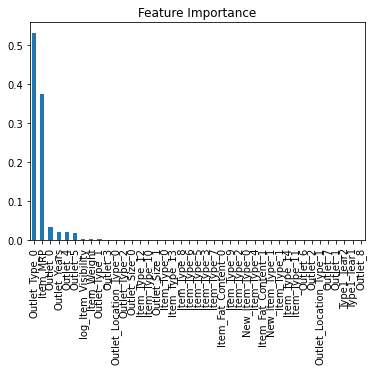

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=1000)
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Extra Tree Regressor

Model Report
MSE: 0.2772261618383779
RMSE: 0.5265227078088636


<Axes: title={'center': 'Feature Importance'}>

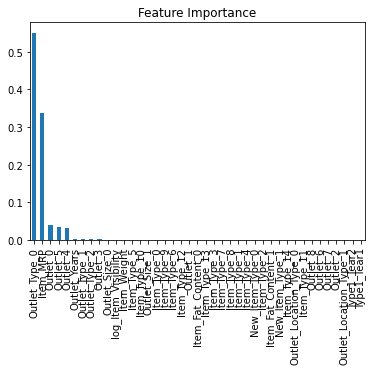

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=1000)
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Decision Tree Regressor

Model Report
MSE: 0.2866299248543001
RMSE: 0.5353783006942848


<Axes: title={'center': 'Feature Importance'}>

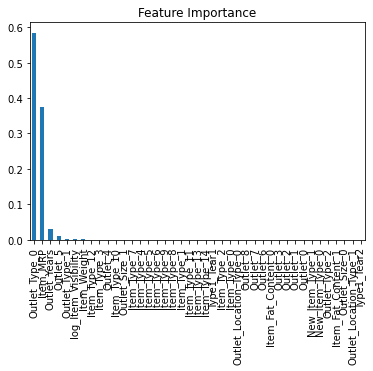

In [ ]:
from sklearn.tree import DecisionTreeRegressor


model =DecisionTreeRegressor(max_depth=5, max_features=35) 
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

## Lasso

Model Report
MSE: 0.28895781296081047
RMSE: 0.5375479634049509


<Axes: title={'center': 'Model Coefficients'}>

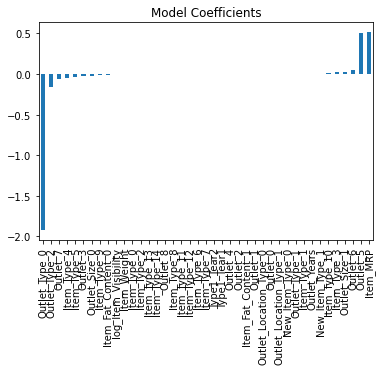

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = Lasso(alpha=0.001, tol=0.001)
train(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

## Ridge

Model Report
MSE: 0.2893112457564342
RMSE: 0.537876608300114


<Axes: title={'center': 'Model Coefficients'}>

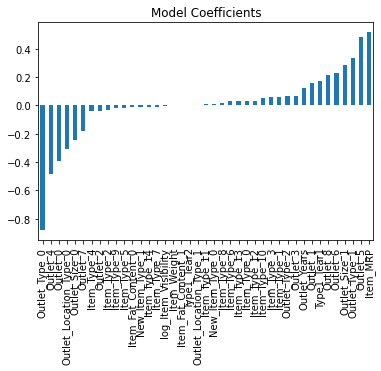

In [ ]:

model = Ridge(alpha=10, max_iter=1000, solver='saga', fit_intercept=True, tol=0.001)

train(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

## Linear Regression

Model Report
MSE: 0.289404410764236
RMSE: 0.5379632057717665


<Axes: title={'center': 'Model Coefficients'}>

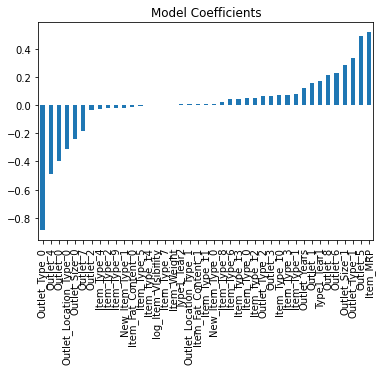

In [ ]:

model = LinearRegression(fit_intercept=True)
train(model, X_norm, y)
coef = pd.Series(model.coef_, X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

## SVR

Model Report
MSE: 0.2936300188948383
RMSE: 0.5418763870984215


<Axes: title={'center': 'Model Coefficients'}>

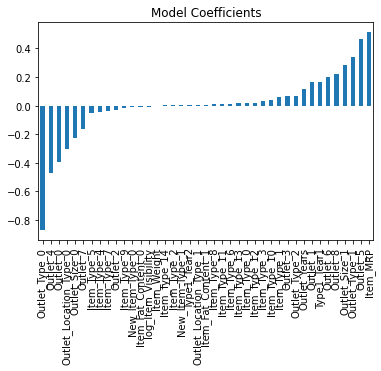

In [ ]:
from sklearn.svm import SVR
model =SVR(C= 0.007, epsilon= 0.005, kernel= 'linear')
train(model, X_norm, y)
#coef = pd.Series(model.coef_, X_norm.columns).sort_values(ascending=False)

#coef= model.coef_
#coef = pd.Series(coef[0], X_norm.columns).sort_values(ascending=False)

#coef.plot(kind='bar', title="Feature Importance")
coef = pd.Series(model.coef_[0], X_norm.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

## voting regressor (Linear regression, Lasso, Ridge,Tree)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

linear_reg =  LinearRegression(fit_intercept=True)
lasso = Lasso(alpha=0.001, tol=1e-06, fit_intercept=True,max_iter = 1000)
ridge = Ridge(alpha=1, max_iter=1000, solver='saga')

ensemble = VotingRegressor(estimators=[('linear_reg', linear_reg),('lasso', lasso),('ridge',ridge)],n_jobs=1)
weights = [0.1,0.75,0.1]
ensemble.set_params( weights=weights)

train(ensemble,X_norm,y)

      

Model Report
MSE: 0.28898503620243005
RMSE: 0.5375732844947096


In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

tree_reg = RandomForestRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=1000)
linear_reg = Lasso(alpha=0.001, tol=1e-06, fit_intercept=True,max_iter = 1000)
extre_reg = ExtraTreesRegressor(bootstrap=True, max_depth=5, max_features=35, n_estimators=1000)
ensemble = VotingRegressor(estimators=[('rf', tree_reg),('lasso', linear_reg),('et',extre_reg)])

# Train the ensemble model on the sample data
ensemble.fit(X_norm, y)
pred = ensemble.predict(X_norm)
cv_score = cross_val_score(ensemble, X_norm, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
    
print("Model Report")
print("MSE:",mean_squared_error(y,pred))
    #print("confusion_matrix:",confusion_matrix(y,pred))
print("CV Score:", cv_score)

Model Report
MSE: 0.2681886604202103
CV Score: 0.27400107280451386
